# Graphs III
## The Caffeine Molecule - Revisited

Now we want to train an actual GNN on our Caffeine molecule. The task is to predict the kind of atom (node) based on the node features and edge attributes. This is a classification problem. In our case, the problem is actually very simple since we know the atomic mass, but let us pretent for a moment that we don't know the connection between atomic mass and the actual atom. Think about investigating a social network or pinpointing specific computer/user in the internet in a crime investigation.<br>
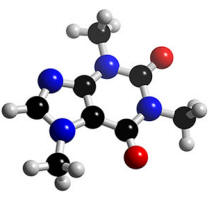
(source: espresso planet)

Also the accuracy won't be great since we have only 24 atoms and their frequencies are also not equally distributed. Nevertheless, we can learn the following aspects<br>
- basic syntax for running a GNN using PyTorch<br>
- how to build a graph such that we can feed it into our model<br>
- understand the dynamics of the training process<br>

<br>

**0) Loading Libraries**

First, we load our standard libraries, including one needed for random sampling. We will need it for the training part. 

In [ ]:
import random
import numpy as np

Next, we load the library *Data*. We will need this library to turn our graph into a *torch_geometric.data.data.Data* object. This particular structure is needed for the GNN.  

In [ ]:
from torch_geometric.data import Data

And of course we need to load PyTorch itself:

In [ ]:
import torch

<br>

**1) Caffeine again**

First, we need to create the caffeine molecule again. We run the same code as in Graph II.

In [ ]:
Atoms = ['C1', 'C2', 'C3', 'C4','C5', 'C6', 'C7', 'C8',\
         'H1', 'H2','H3', 'H4','H5', 'H6','H7', 'H8','H9', 'H10',\
         'N1', 'N2', 'N3', 'N4',\
         'O1', 'O2']

N     = len(Atoms)

Mass  = np.array([12,12,12,12,12,12,12,12,\
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\
                  14,14,14,14,\
                  16,16])

#electronegativity    
Eminus = np.array([2.55, 2.55, 2.55, 2.55, 2.55, 2.55, 2.55, 2.55,\
                   2.20, 2.20, 2.20, 2.20, 2.20, 2.20, 2.20, 2.20, 2.20, 2.20,\
                   3.04, 3.04, 3.04, 3.04,\
                   3.44, 3.44])

A = np.array((
             [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0],
             [0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
             [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

SpecEminus  = Eminus/Mass
DSpecEminus = np.tile(SpecEminus, (N,1)).transpose() - np.tile(SpecEminus, (N,1))

Affinity    = A * (DSpecEminus + 1 - np.eye(N)) #np.eye removes diagonal elements       

Adj_Tuple = []
Weights   = []#from  Affinity Matrix
Edges     = []

for i in range(N):
    for j in range(N):
        if A[i,j] != 0:
            Adj_Tuple += [(Atoms[i], Atoms[j])]
            Weights   += [Affinity[i,j]]
            Edges     += [(i, j)]

<br>

**2) Creating X and Y**

Since we are attempting to solve a classification problem, we need to create the target class vector *Y* and the corresponding feature matrix *X*. The vector *Y* is just our well known sparse class vector (**not one-hot encoded!**), whereas *X* is a matrix where each row corresponds to a node and each column contains the value of one feature (here: atomic mass and electronegativity).   

In [ ]:
#Y: sparse vector for classes
Y = np.zeros((N,))
#X: is a list of nodes with features:
X = np.zeros((N, 2))

for i, (a,m,e) in enumerate(zip(Atoms, Mass, Eminus)):
    if 'C' in a:
        c = 0
    if 'H' in a:
        c = 1
    if 'N' in a:
        c = 2
    if 'O' in a:
        c = 3
    X[i,:] = [m, e]    
    Y[i]   = c

We check for consistency:

In [ ]:
print(Y)

In [ ]:
print(X)

<br>

**3) Generating the *torch_geometric.data.data.Data* object**

The next step is to turn the graph into a **torch tensor** with attributes such as edges and weights and also *X* and *Y*. A tricky part is that PyTorch expects specific data types for some attributes such as float32 (instead of float64) and *long* format. We need to stick to these specific requirements. Otherwise PyTorch will prompt error messages that might be hard to interprete.<br>
Also make sure that the edge indexing worked well, such that the maximum value in *Edges* does not exceed the number of nodes.

In [ ]:
x           = torch.tensor(X, dtype = torch.float) #has to be float
y           = torch.tensor(Y, dtype = torch.long)  #has to be long format
edge_index  = torch.tensor(np.array(Edges).transpose(), dtype=torch.long)
edge_weight = torch.tensor(Weights, dtype=torch.float)

In [ ]:
print(edge_weight)

How does the training actually work? The idea is that we **leave some nodes out** and try to predict their class based on the neighbouring nodes and then compare the predicted classes to the actual class. In order to do that, we need to create a training mask that contains boolean which tell PyTorch which node has to be left out (= *True*). We select these nodes randomly with the typical 30% validation to 70% training ratio.

In [ ]:
training_mask = torch.tensor(np.random.choice([True, False], N, p = [0.3, 0.7]), dtype=torch.bool)

Now we are ready to create the *Data* object.

In [ ]:
my_data = Data(x = x, y = y, training_mask = training_mask, edge_index = edge_index, edge_attr = edge_weight)

In [ ]:
print(my_data)

<br>

**4) The Model**

We want to run our data on a two layer convolution GNN and add a soft max layer for classification. Each node can be embedded in an arbitrary number of dimensions (=hidden states or neurons). Like when we connected different dense layer or convolution layer, we can now connect the convolution GNN layer in the same way. Always keep in mind that it is just a simple matrix multiplication that is ran under the hood.  

In [ ]:
#import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [ ]:
class My_GCN(torch.nn.Module):
    
    def __init__(self, n_node_features, n_neuron, n_classes):
        super(My_GCN, self).__init__()
        
        self.conv1 = GCNConv(n_node_features, n_neuron)
        self.conv2 = GCNConv(n_neuron, n_classes)
        

    def forward(self, x, edge_index, edge_weight):
        
        x1 = self.conv1(x, edge_index, edge_weight = edge_weight)
        x2 = F.relu(x1)
        x3 = self.conv2(x2, edge_index, edge_weight = edge_weight)
        
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3
        
        return F.log_softmax(x3, dim = 1)

Next, we define a new class that initializes the model, calls an optimizer (here *Adam*) and runs the model.

In [ ]:
class FitModel():
    
    def __init__(self, my_model, learning_rate: float = 0.01):
        
        self.optimizer = torch.optim.Adam(my_model.parameters(), lr = learning_rate)
        self.model = my_model
        
        
    def Run(self, data, N_epochs: int = 200):
        
        lY = len(data.y)
        
        for n in range(N_epochs):
            
            self.model.train()
            self.optimizer.zero_grad()
            
            out = self.model(data.x, data.edge_index, data.edge_attr)
            loss = F.nll_loss(out[data.training_mask], data.y[data.training_mask])
            loss.backward()
            
            self.optimizer.step()
            
            Y_pred = out.argmax(dim=1)
            
            acc    = (Y_pred == data.y).sum()/lY
            
            if not n % 10:
                print(f'epoch: {n:>3} | loss: {loss:.2f} | accuracy: {acc*100:.2f}%' )
        
        
        self.out = out

Now, we are ready to run our model:

In [ ]:
my_model = My_GCN(n_node_features = 2, n_neuron = 100, n_classes = 4)
my_model

In [ ]:
My_Fit = FitModel(my_model, 0.0001)

In [ ]:
My_Fit.Run(my_data)

Let us evaluate the result:

In [ ]:
Probs = np.exp(My_Fit.out.detach()).detach() #since we used log softmax

In [ ]:
Y_pred = Probs.argmax(dim=1)

In [ ]:
print(Probs)

In [ ]:
print(Y)
print(Y_pred)

In [ ]:
acc    = (Y_pred == my_data.y).sum()/N

In [ ]:
print(acc)